In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('1730285881-Airbnb_Open_Data.csv', low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.duplicated().value_counts()

False    102058
True        541
dtype: int64

In [8]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [18]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop 'house_rules' and 'license' columns if they exist
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Remove all dollar signs in the price and service fee columns (only if columns exist)
if 'price' in df.columns:
    df['price'] = df['price'].str.replace('$', '', regex=False)
if 'service_fee' in df.columns:
    df['service_fee'] = df['service_fee'].str.replace('$', '', regex=False)

# Remove all commas in the price and service fee columns (only if columns exist)
if 'price' in df.columns:
    df['price'] = df['price'].str.replace(',', '', regex=False)
if 'service_fee' in df.columns:
    df['service_fee'] = df['service_fee'].str.replace(',', '', regex=False)

# Rename the price and service fee columns to include a dollar sign (only if columns exist)
rename_dict = {}
if 'price' in df.columns:
    rename_dict['price'] = 'price_$'
if 'service_fee' in df.columns:
    rename_dict['service_fee'] = 'service_fee_$'
df.rename(columns=rename_dict, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change all mismatched data types to the appropriate ones (only if columns exist)
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)
if 'id' in df.columns:
    df['id'] = df['id'].astype(int)
if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'])
if 'construction year' in df.columns:
    df['construction year'] = df['construction year'].astype(int)


In [19]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,2010.0,580.0,$116,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0


In [20]:
df.describe()

,id,lat,long,Construction year,price_$,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,8.341200e+04,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000
mean,2.957469e+07,40.727354,-73.948500,2012.488467,626.219441,7.405313,32.279037,1.377606,3.278797,7.032609,141.784995
std,1.621861e+07,0.056325,0.050347,5.760848,331.790851,28.102056,51.962067,1.751042,1.283606,29.551420,133.928159
min,1.001254e+06,40.504560,-74.249840,2003.000000,50.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.541402e+07,40.687650,-73.982110,2007.000000,340.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,3.075788e+07,40.721320,-73.953720,2012.000000,625.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,4.331497e+07,40.762600,-73.930817,2017.000000,914.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,40.916970,-73.705220,2022.000000,1200.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


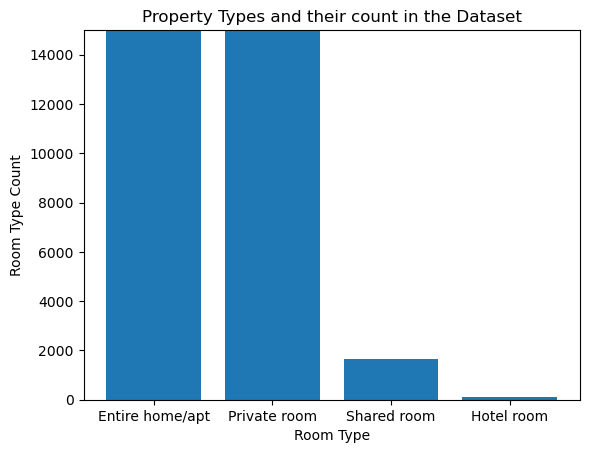

In [24]:
# Get the different property types in the dataset
property_types = df['room type'].value_counts().to_frame()
property_types.columns = ['count']  # Rename the column explicitly to 'count'

# Plot room type count on a bar chart
plt.bar(property_types.index, property_types['count'])
plt.ylim(0, 15000)
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')
plt.show()


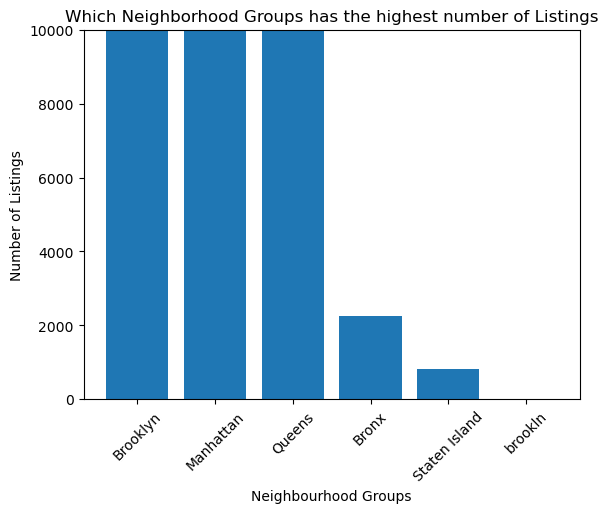

In [25]:
# Get the different neighborhood groups in the dataset
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group.columns = ['count']  # Rename the column explicitly to 'count'

# Plot which neighborhood group has the highest number of listings
plt.bar(hood_group.index, hood_group['count'])
plt.ylim(0, 10000)
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Which Neighborhood Groups has the highest number of Listings')
plt.show()


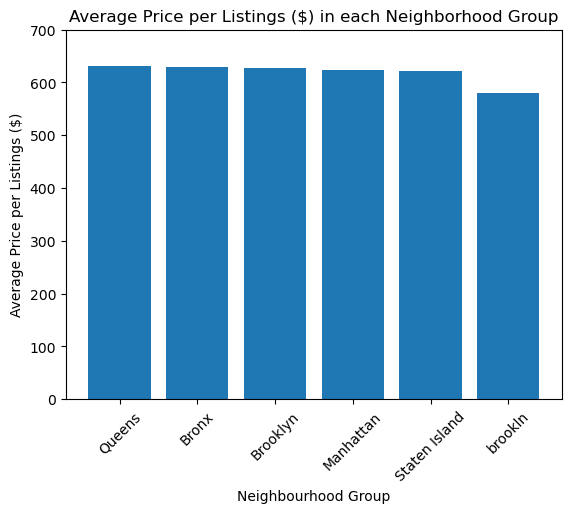

In [26]:
# Which neighbourhood group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

# Bar plot for average price per listing by neighbourhood group
plt.bar(avg_price.index, avg_price['price_$'])
plt.ylim(0, 700)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')
plt.show()


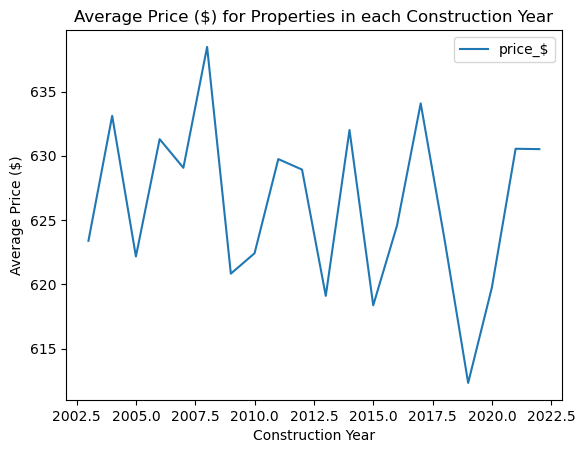

In [29]:
# Use the exact column name: 'Construction year' (case-sensitive)
df.groupby('Construction year')['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')
plt.show()


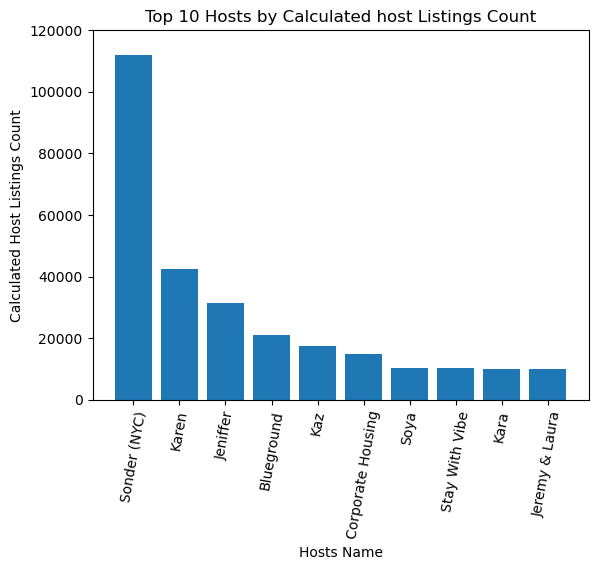

In [30]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

plt.bar(hosts.index, hosts['calculated host listings count'])
plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim(0, 120000)
plt.title('Top 10 Hosts by Calculated host Listings Count')
plt.show()


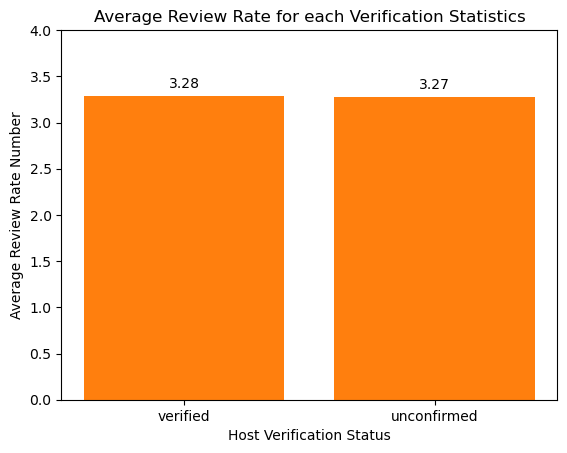

In [31]:
# Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()

# Bar plot for average review rate by host identity verification status
plt.bar(review.index, review['review rate number'])
plt.bar_label(plt.bar(review.index, review['review rate number']), labels=round(review['review rate number'], 2), padding=4)
plt.ylim(0, 4)
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each Verification Statistics')
plt.show()


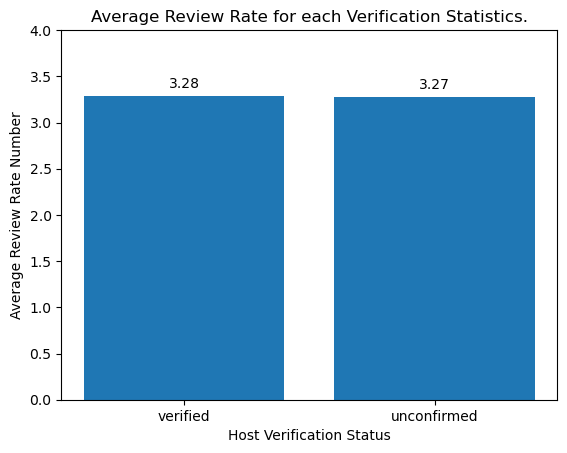

In [32]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2), padding=4)
plt.ylim(0, 4)
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each Verification Statistics.')
plt.show()

    

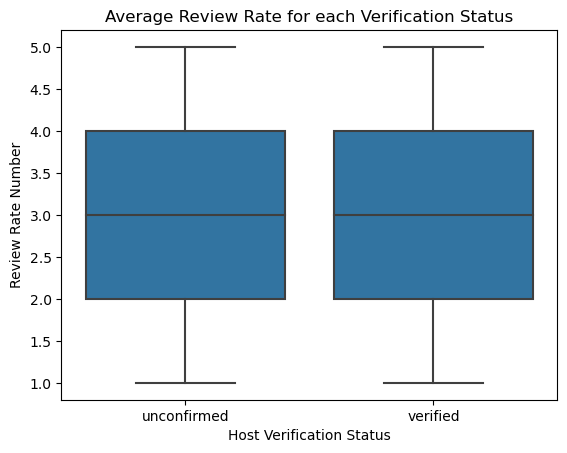

In [33]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')
plt.show()


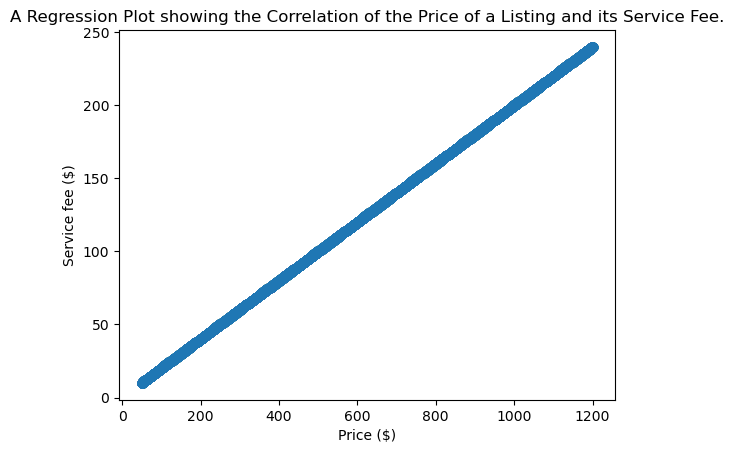

In [39]:
# Regression plot for correlation between price and service fee
sns.regplot(x='price_$', y='service fee', data=df)
plt.xlabel('Price ($)')
plt.ylabel('Service fee ($)')
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.')
plt.show()


In [40]:

ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN


review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274860
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268930
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brookln             Private room               4.000000

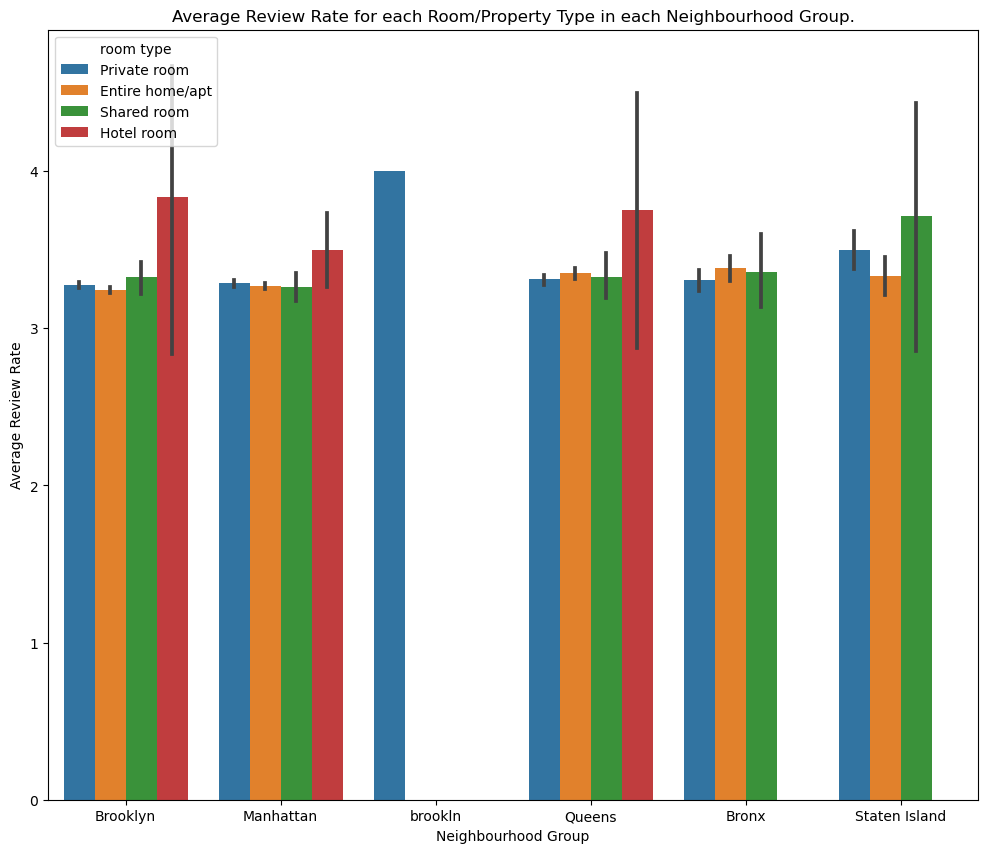

In [41]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="neighbourhood group", y="review rate number", hue="room type")
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.')
plt.show()


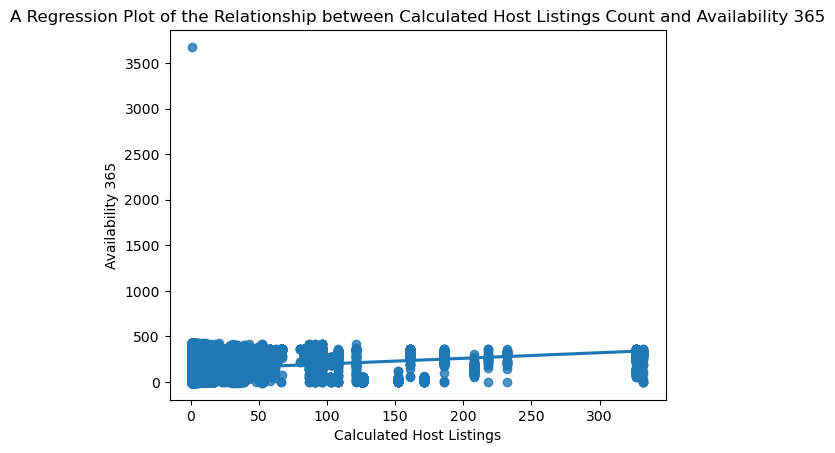

In [42]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data=df, x='calculated host listings count', y='availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')
plt.show()


In [43]:
df['calculated host listings count'].corr(df['availability 365'])


0.13535172019881514